# Data Mining & Machine Learning - Regression Part 2

### Case 2: Prediction of Footballer Values with Supervised Learning

83109 Samuel Didovic<br>
86368 Isabel Lober<br>
85915 Pascal Seitz<br>

Lecturer: Prof. Dr. Adrian Moriariu

In [111]:
import warnings
warnings.filterwarnings("ignore")

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import os
import seaborn as sns
import matplotlib as mpl

In [113]:
# Loading the data
filename = "football_cleaned"

# Data folder
data_dir = "football-data"

file_path = f"{data_dir}/{filename}.csv"

# Read the CSV file directly, specifying the delimiter and thousands separator
df = pd.read_csv(file_path, delimiter=',', thousands=',')

In [114]:
df.head()

,player,position,squad,age,birth_year,value,height,foot,league,games,...,Attendance,CL,WinCL,Season,year,player_id,nationality_code,positions_played,position_type,specific_position
0,Burgui,"FW,MF",Alavés,23.0,1993.0,1800000.0,186.0,right,La Liga,23.0,...,16819.0,0.0,0.0,201718#,2017,379.0,ESP,2,Forward,Left-Winger
1,Raphaël Varane,DF,Real Madrid,24.0,1993.0,70000000.0,191.0,right,La Liga,27.0,...,66161.0,1.0,1.0,201718#,2017,2530.0,FRA,1,Defender,Centre-back
2,Rubén Duarte,DF,Alavés,21.0,1995.0,2000000.0,179.0,left,La Liga,24.0,...,16819.0,0.0,0.0,201718#,2017,721.0,ESP,1,Defender,Left-back
3,Samuel Umtiti,DF,Barcelona,23.0,1993.0,60000000.0,182.0,left,La Liga,25.0,...,66603.0,1.0,0.0,201718#,2017,2512.0,FRA,1,Defender,Centre-back
4,Manu García,MF,Alavés,31.0,1986.0,1800000.0,183.0,left,La Liga,30.0,...,16819.0,0.0,0.0,201718#,2017,882.0,ESP,1,Midfielder,Defensive-Midfield


In [115]:
df.set_index('player_id', inplace=True)

In [116]:
# Identifying non-numeric features
non_numeric_features = df.select_dtypes(include=['object', 'category']).columns

print(non_numeric_features)

Index(['player', 'position', 'squad', 'foot', 'league', 'Season',
       'nationality_code', 'position_type', 'specific_position'],
      dtype='object')


In [117]:
columns_to_drop = ['player', 'birth_year', 'Season', 'value']  # Columns to drop from the dataset 

X = df.drop(columns_to_drop, axis=1)  # Drop target and any non-predictive columns
y = df['value']  # Target variable


In [118]:
# Identifying numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [119]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
# Define categorical and binary features
categorical_features = ['position', 'squad', 'league', 'nationality_code', 'specific_position', 'position_type']
binary_features = ['foot']

# Create transformers for categorical, binary, and numerical data
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

binary_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='if_binary', handle_unknown="ignore"))
])

numerical_transformer = Pipeline([
    ('scaler', StandardScaler())  # Standardizing numerical features
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)
    ], remainder='passthrough')

In [120]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [121]:

# Create the full pipeline with a regressor
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=6, random_state=42))
])

# Now you can fit and evaluate the pipeline
# X_train and y_train need to be defined previously as your features and target
full_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height', 'games',
                                                   'games_starts', 'minutes',
                                                   'goals', 'assists',
                                                   'pens_made', 'pens_att',
                                                   'cards_yellow', 'cards_red',
                                                   'goals_per90',
                                                   'assists_per90',
                                                   'goals_assists_per90',
                                                   'goals_pens_per90',
                                                   'goals_assists_pens_p...
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['position', 'squad',
                                                   'league', 'nationality_code',
                                                   'specific_position',
                                                   'position_type']),
                                                 ('bin',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['foot'])])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.2, max_depth=6,
                                           n_estimators=200,
                                           random_state=42))])

In [122]:
# Evaluate the model
y_test_pred = full_pipeline.predict(X_test)
y_train_pred = full_pipeline.predict(X_train)

In [123]:
from sklearn.metrics import mean_squared_error

# Calculate MSE on the original scale
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"***Mean Squared Error***\nTest: {test_mse}\nTrain: {train_mse}")

***Mean Squared Error***
Test: 60434970538828.49
Train: 565387261725.534


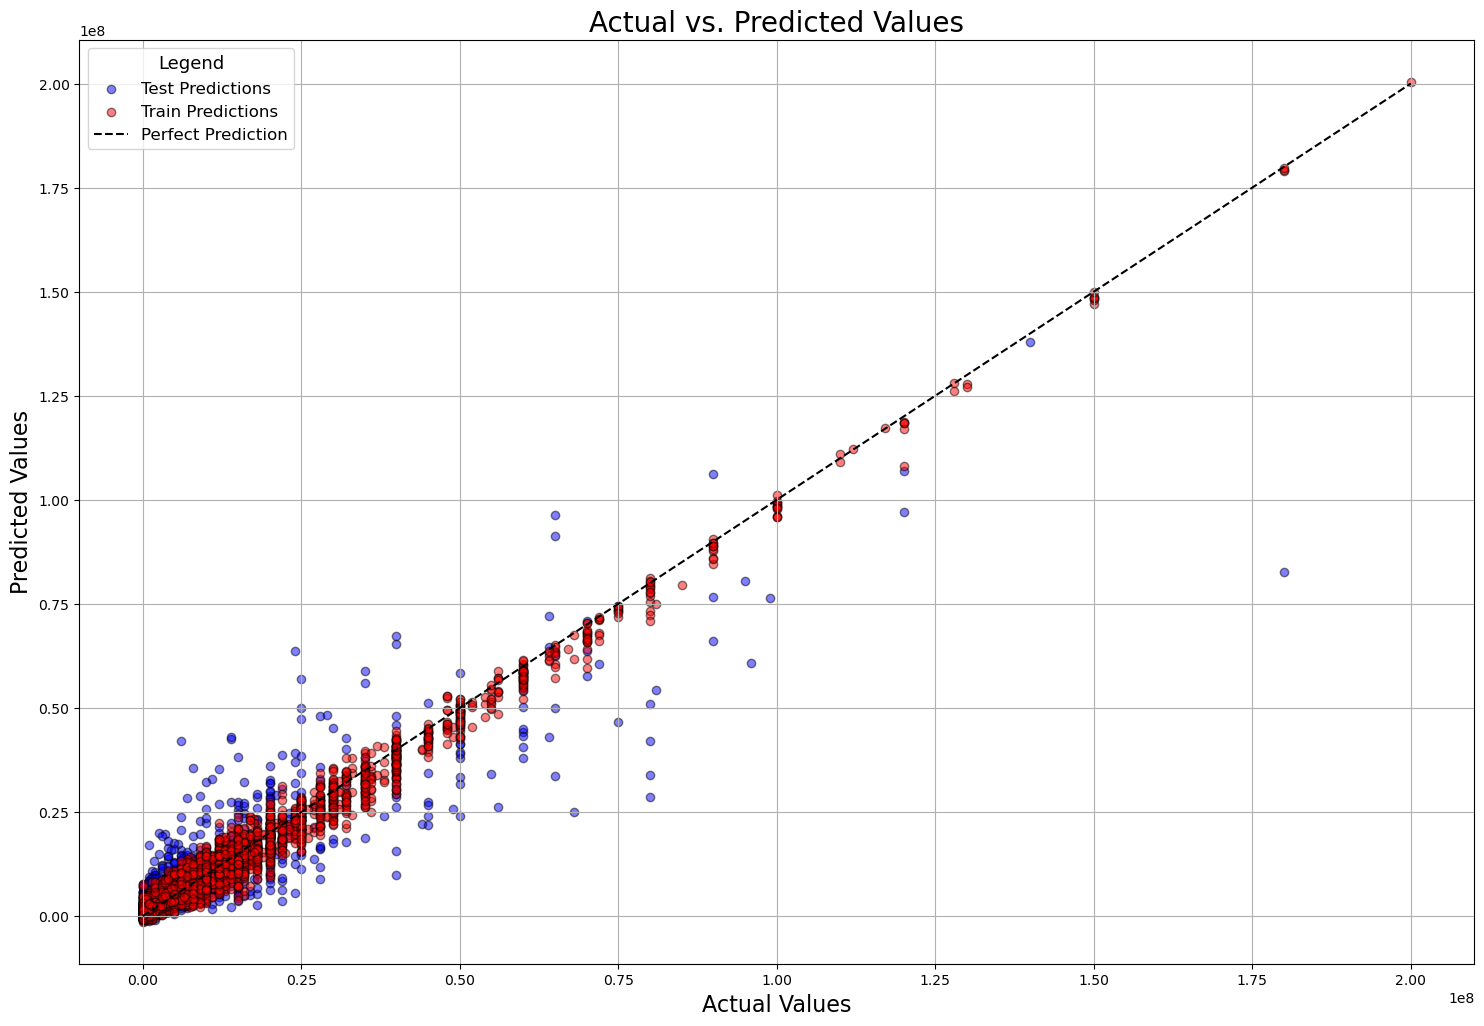

In [110]:
import matplotlib.pyplot as plt

# Set up the figure with a larger size for better visibility
plt.figure(figsize=(18, 12))

# Plot test predictions in blue
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, edgecolor='k', label='Test Predictions')
# Plot training predictions in red
plt.scatter(y_train, y_train_pred, color='red', alpha=0.5, edgecolor='k', label='Train Predictions')
# Add a line of perfect prediction
plt.plot([0, max(y_test.max(), y_train.max())], [0, max(y_test.max(), y_train.max())], color='black', linestyle='--', label='Perfect Prediction')

# Adding titles and labels
plt.title('Actual vs. Predicted Values', fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)

# Add a grid for better readability
plt.grid(True)

# Add a legend to explain which markers are which
plt.legend(title="Legend", title_fontsize='13', fontsize='12', loc='upper left')

# Show the plot
plt.show()
